TANH Model Training:
SSE Score: 0.199874 | Training: ========================================                   

Default Model Training:
SSE Score: 0.083932 | Training: ========================================                   

Combo Model Training
SSE Score: 0.006170 | Training: ========================================                   

Plotted Results:


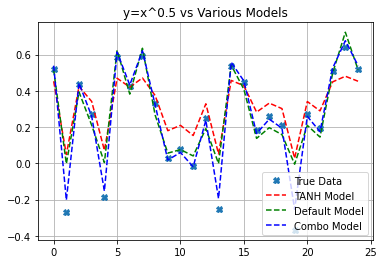

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import main as mc

## CONTEXT ##
# The below shows how to setup the models, fit them, and show their predictions
# Most of this is essentially the same as other common packages out there
# 
# For this simple dataset, 3 models are made and fitted (to 50% of the data)
# with the total results graphed. Note how models that use the same activation
# for all layers (tanh model) aren't very good models. The default model (see
# details below) tends to preform the 2nd best, and the combination model
# using dSILU (Elfwing, et al.) tends to preform the best

rng = np.random.RandomState(10001)

# Data to fit to (f(x) = x^0.5)
# You can increase the number of samples by changing the X variable
X = rng.rand(25)*2 # Gives domain of [0, 2)
Y = X**0.5 - 0.75

# Assemble a few models to test
net_tanh  = mc.MCRegressor([25], activations='tanh')         # All layers use TANH activation (this is a bad idea, limits output to [-1, 1])
net_silu   = mc.MCRegressor([25], activations="DEFAULT")     # Default activations is lin/SILU/.../lin
net_combo = mc.MCRegressor([25], ['relu', 'dsilu', 'lin'])    # Uses a combination of activations

# An equal alternative definition for the TANH model:
# net_tanh = MCRegressor([25], ['tanh', 'tanh', 'tanh'])

# An equal alternative definition for the SILU model (lin/SILU/.../lin is default):
# net_silu = MCRegressor([25])  

# Train-Test Split (Taking only the train group)
xt, xv, yt, yv = mc.TTSplit(X, Y, percentTrain=50)

# fit the models to the training data group
print("TANH Model Training:")
net_tanh.fit(xt, yt, useFast=False)

print("\nDefault Model Training:")
net_silu.fit(xt, yt)

print("\nCombo Model Training")
net_combo.fit(xt, yt)

# Get the models predictions to the full data set
ym_tanh  = net_tanh.predict(X, useFast=False)
ym_silu   = net_silu.predict(X)
ym_combo = net_combo.predict(X)

# Plot and compare the results of the models
print("\nPlotted Results:")
plt.plot(Y, 'X')
plt.plot(ym_tanh, 'r--')
plt.plot(ym_silu, 'g--')
plt.plot(ym_combo, 'b--')

plt.grid(True)
plt.title(f"y=x^0.5 vs Various Models")
plt.legend(["True Data", "TANH Model", "Default Model", "Combo Model"])

plt.show()

# SILU Reference
# 1. SILU and dSILU activation functions
# Stefan Elfwing, Eiji Uchibe, Kenji Doya,
# Sigmoid-weighted linear units for neural network function approximation in reinforcement learning,
# Neural Networks,
# Volume 107,
# 2018,
# Pages 3-11,
# ISSN 0893-6080,
# https://doi.org/10.1016/j.neunet.2017.12.012.
# (https://www.sciencedirect.com/science/article/pii/S0893608017302976)